In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','messages'])

In [3]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Data cleaning and preprocessing

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [7]:
corpus = []
ps = PorterStemmer()
for i in range(len(messages)) :
    sms = re.sub('[^a-zA-Z]',' ',messages['messages'][i])
    sms = sms.lower()
    sms = sms.split()
    
    sms = [ps.stem(word) for word in sms if word not in stopwords.words('english')]
    sms = " ".join(sms)
    corpus.append(sms)

### Creating Bag of words model

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = messages['label']

### Performing train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Model training

In [19]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

### Model Evaluation

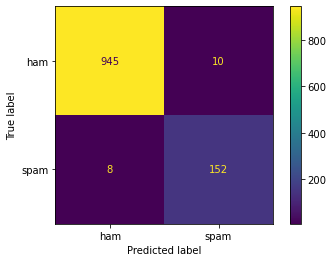

In [23]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(spam_detect_model,X_test,y_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       955
        spam       0.94      0.95      0.94       160

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115

